### PREDICTING ADMISSION CHANCES - REGRESSION CASE STUDY

### LOAD LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!! cd

['C:\\Users\\nagal\\demo\\admission']

In [3]:
df = pd.read_csv("admission.csv")

In [4]:
df

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### UNDERSTAND DATA

In [5]:
df.sample(5)    # ANY 5 RANDOM VALUES

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
483,484,304,103,5,5.0,3.0,7.92,0,0.71
230,231,313,104,3,4.0,4.5,8.65,0,0.73
264,265,325,110,2,3.0,2.5,8.76,1,0.75
435,436,309,105,2,2.5,4.0,7.68,0,0.55
437,438,317,106,1,1.5,3.5,7.65,1,0.61


In [6]:
df.shape

(500, 9)

In [7]:
# DROP COLUMN SNO AS IT IS NOT INFLUENCING THE CHANCE OF GETTING THE SEAT
df.drop(columns = ["Sno"], inplace = True)

In [8]:
df.info()  # INFORMATION ABOUT THE DATA SET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gre       500 non-null    int64  
 1   Toefl     500 non-null    int64  
 2   Rating    500 non-null    int64  
 3   Sop       500 non-null    float64
 4   Lor       500 non-null    float64
 5   Cgpa      500 non-null    float64
 6   Research  500 non-null    int64  
 7   Chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### DATA VISUALIZATION

### UNIVARIATE ANALYSIS

In [10]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

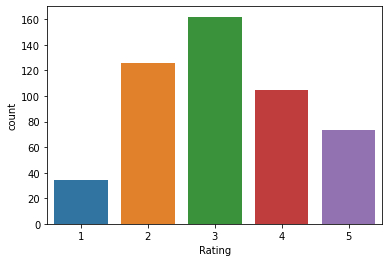

In [11]:
sns.countplot( x = "Rating", data = df)

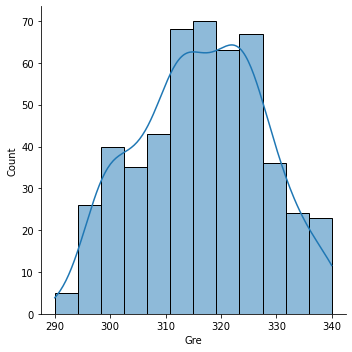

In [12]:
sns.displot(df.Gre, kde = True)

C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cgpa'>

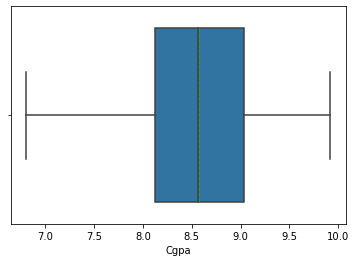

In [13]:
sns.boxplot(df.Cgpa, showmeans = True, meanline = True)

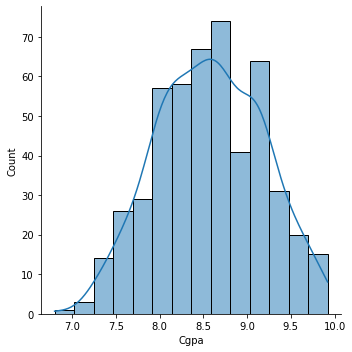

In [14]:
sns.displot(df.Cgpa, kde = True)

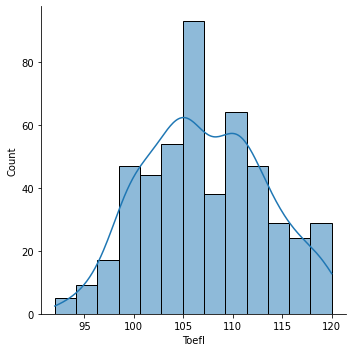

In [15]:
sns.displot(df.Toefl, kde = True)

<AxesSubplot:>

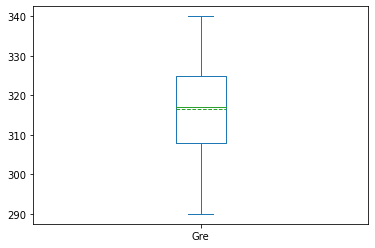

In [16]:
df.Gre.plot.box(showmeans = True, meanline = True)  # BOL PLOT FOR CGPA

<AxesSubplot:>

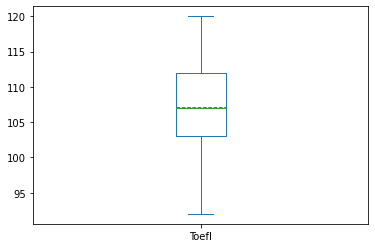

In [17]:
df.Toefl.plot.box(showmeans = True, meanline = True)

<AxesSubplot:>

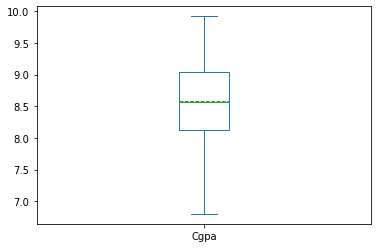

In [18]:
df.Cgpa.plot.box(showmeans = True, meanline = True)

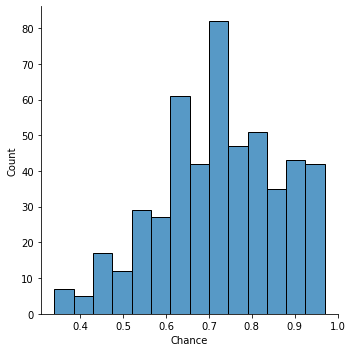

In [19]:
sns.displot(df.Chance)   # DISTRIBUTION PLOT

<AxesSubplot:>

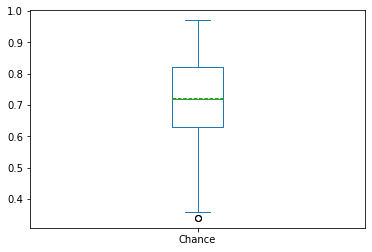

In [20]:
df.Chance.plot.box(showmeans = True, meanline = True)

<AxesSubplot:>

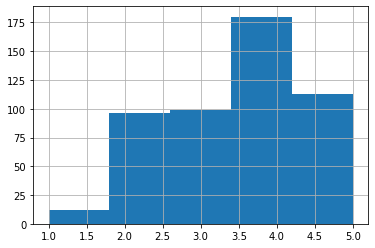

In [21]:
df.Lor.hist(bins = 5)   # HISTOGRAM FOR LETTER OF RECOMMENDATION WITH 5 BINS

In [22]:
df.Sop.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: Sop, dtype: int64

In [23]:
df.Sop.value_counts().sort_index()

1.0     6
1.5    25
2.0    43
2.5    64
3.0    80
3.5    88
4.0    89
4.5    63
5.0    42
Name: Sop, dtype: int64

<AxesSubplot:xlabel='Research', ylabel='count'>

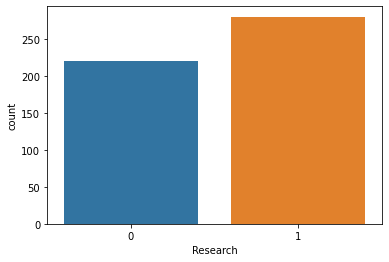

In [24]:
sns.countplot(x = "Research" , data = df)

In [25]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Rating', ylabel='Gre'>

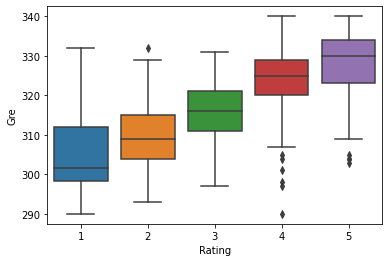

In [26]:
sns.boxplot(x = "Rating", y = "Gre", data = df)   # COMPARE CATEGORICAL WITH CONTINUOUS VARIABLE

<AxesSubplot:xlabel='Rating', ylabel='Cgpa'>

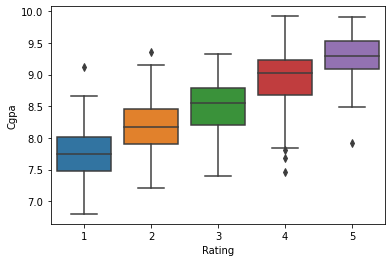

In [27]:
sns.boxplot(x = "Rating", y = "Cgpa", data = df)

<AxesSubplot:xlabel='Rating', ylabel='Toefl'>

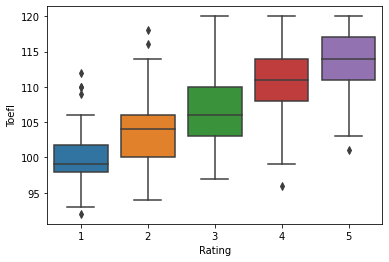

In [28]:
sns.boxplot( x = "Rating", y = "Toefl", data = df)

<AxesSubplot:xlabel='Toefl', ylabel='Gre'>

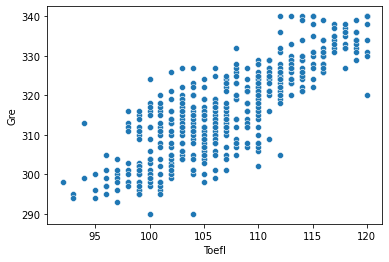

In [29]:
sns.scatterplot(x = "Toefl", y = "Gre", data = df)

<AxesSubplot:xlabel='Toefl', ylabel='Gre'>

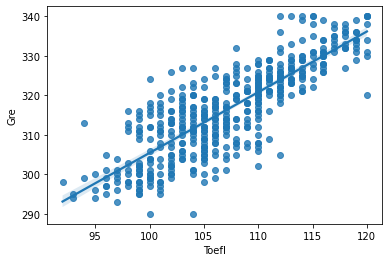

In [30]:
sns.regplot(x = "Toefl", y = "Gre", data = df)

### DIMENSIONALITY REDUCTION MEANS REDUCE THE NUMBER OF COLUMNS

In [31]:
df[["Gre", "Toefl", "Cgpa", "Chance"]].corr()   # DIMENSIONALITY REDUCTION WHICH WILL BE THE OUTCOME OF CHANCE

,Gre,Toefl,Cgpa,Chance
Gre,1.000000,0.827200,0.825878,0.810351
Toefl,0.827200,1.000000,0.810574,0.792228
Cgpa,0.825878,0.810574,1.000000,0.882413
Chance,0.810351,0.792228,0.882413,1.000000


In [32]:
df.corr()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:xlabel='Cgpa', ylabel='Gre'>

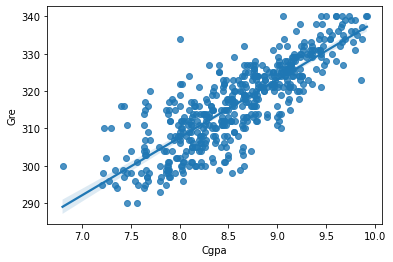

In [33]:
sns.regplot(x = "Cgpa", y = "Gre", data = df)

<AxesSubplot:xlabel='Cgpa', ylabel='Chance'>

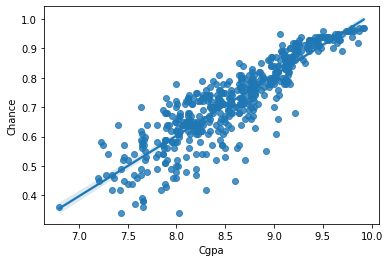

In [34]:
sns.regplot(x = "Cgpa", y = "Chance", data = df)

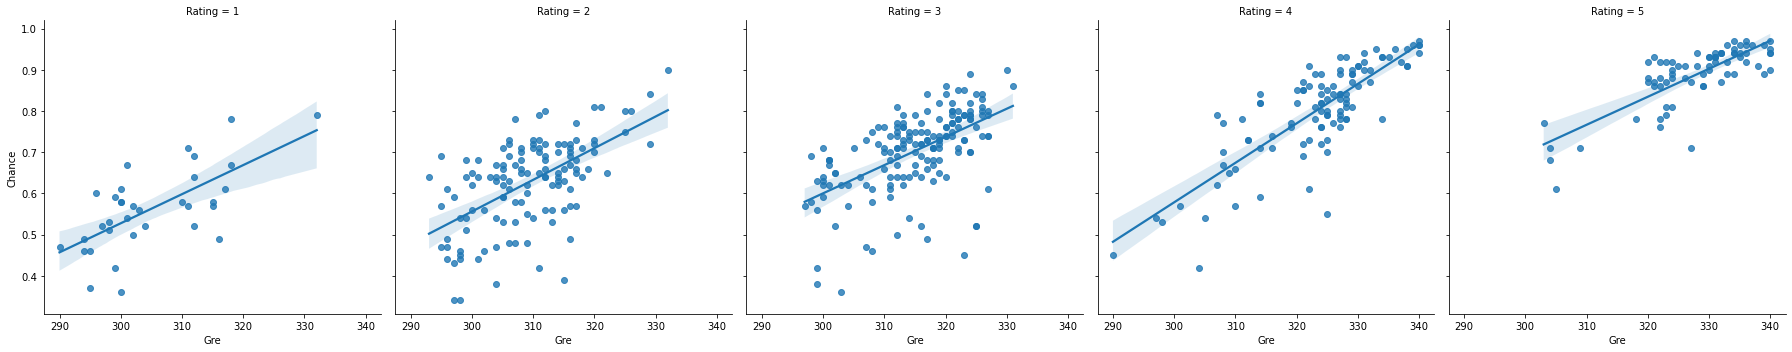

In [35]:
sns.lmplot(x = "Gre", y = "Chance", col = "Rating", data = df)

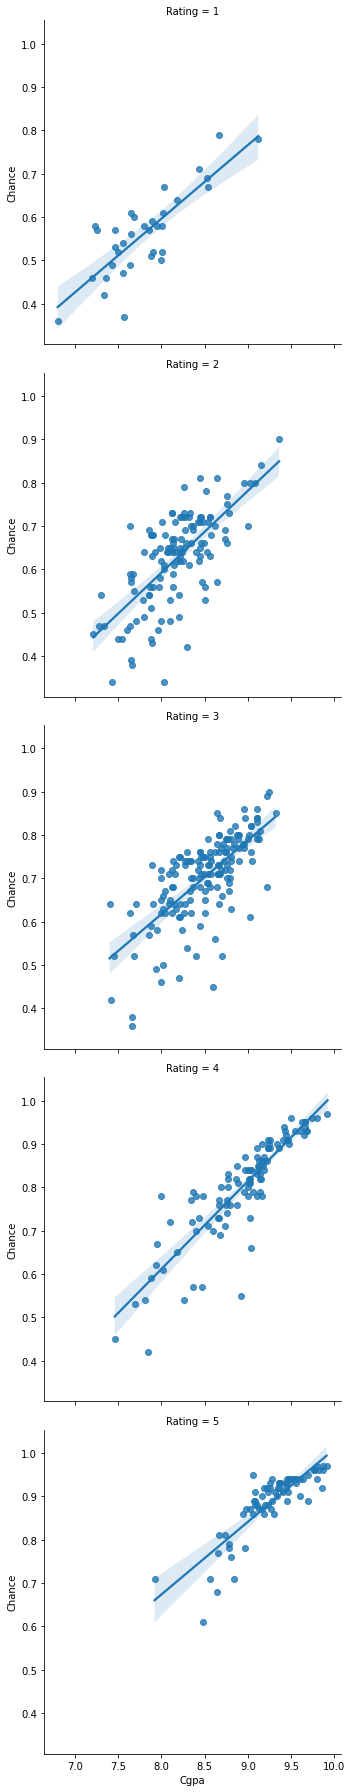

In [36]:
sns.lmplot(x = "Cgpa", y = "Chance", row = "Rating", data = df)

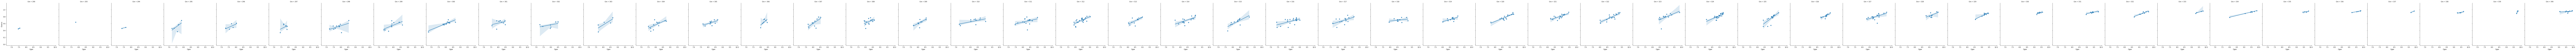

In [37]:
sns.lmplot(x = "Cgpa", y = "Chance", col = "Gre", data = df)

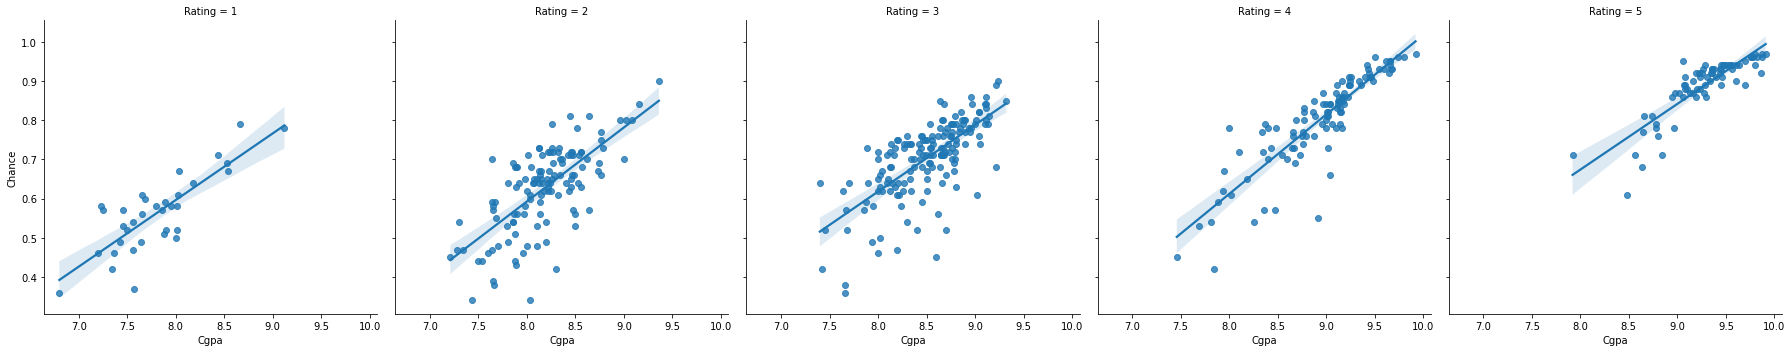

In [38]:
sns.lmplot(x = "Cgpa", y = "Chance", col = "Rating", data = df)

<AxesSubplot:xlabel='Sop', ylabel='Gre'>

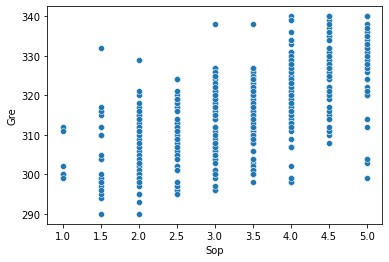

In [39]:
sns.scatterplot(x = "Sop", y = "Gre", data = df)

In [40]:
corrmat = df.corr()

In [41]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [42]:
corrmat["Chance"].sort_values()

Research    0.545871
Lor         0.645365
Sop         0.684137
Rating      0.690132
Toefl       0.792228
Gre         0.810351
Cgpa        0.882413
Chance      1.000000
Name: Chance, dtype: float64

In [43]:
corrmat["Chance"].sort_values(ascending = False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

<AxesSubplot:>

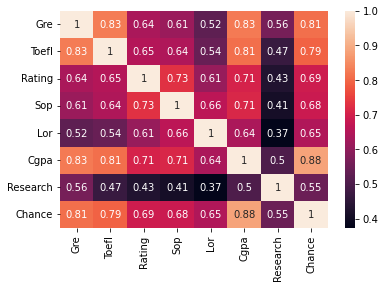

In [44]:
sns.heatmap(corrmat, annot = True)

<AxesSubplot:>

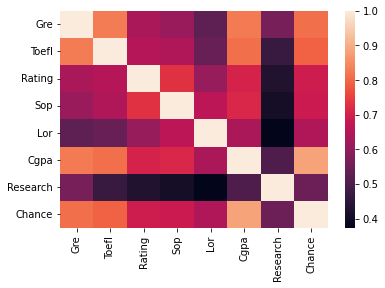

In [45]:
sns.heatmap(corrmat)

<AxesSubplot:>

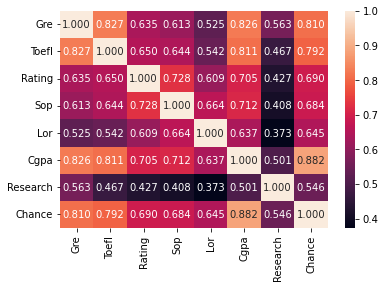

In [46]:
sns.heatmap(corrmat, annot = True, fmt = "0.3f")

<AxesSubplot:xlabel='Chance', ylabel='Cgpa'>

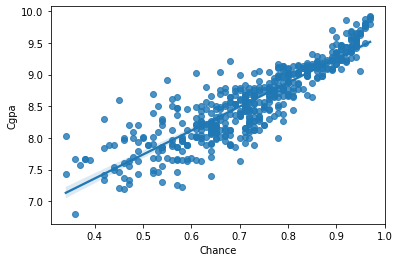

In [47]:
sns.regplot(x = "Chance", y = "Cgpa", data = df)

<AxesSubplot:>

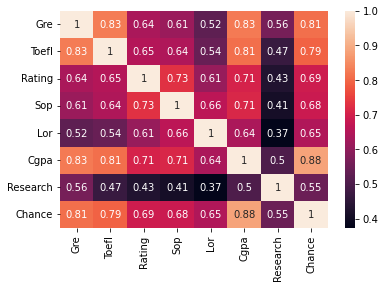

In [48]:
sns.heatmap(corrmat, annot = True)

In [49]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [50]:
corrmat["Chance"]

Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Cgpa        0.882413
Research    0.545871
Chance      1.000000
Name: Chance, dtype: float64

In [51]:
corrmat["Chance"].sort_values()

Research    0.545871
Lor         0.645365
Sop         0.684137
Rating      0.690132
Toefl       0.792228
Gre         0.810351
Cgpa        0.882413
Chance      1.000000
Name: Chance, dtype: float64

In [52]:
corrmat["Chance"].sort_values(ascending = False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

# BUILD MACHINE LEARNING MODEL

### USING SKLEARN AND REGRESSION MODEL

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
X = df[["Gre", "Toefl", "Cgpa"]]    # WHERE CAPITAL X REPRESENTS A MATRIX BECAUSE IT HAS 3COLUMNS, MATRIX IS A 2 DIMENSIONAL
y = df["Chance"]  * 100             # WHERE SMALL y REPRESENTS A VECTOR AS IT HAS ONE COLUMN AND 1DIMENSIONAL

In [55]:
# SPLIT DATA INTO TRAIN AND TEST
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 3), (100, 3), (400,), (100,))

In [57]:
# FIT MODEL OR TRAIN MODEL OR BUILD MODEL
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
lr_model.coef_       # SLOPES OF PARAMETRS

array([ 0.2530053 ,  0.31789215, 14.25427517])

In [59]:
lr_model.intercept_   # INTERCEPT 

-164.24396080709764

In [60]:
gre = 320
tof = 110
cgpa = 9.2
chance = lr_model.intercept_  + gre * lr_model.coef_[0]  + tof * lr_model.coef_[1]  + cgpa * lr_model.coef_[2]

In [61]:
print(chance)

82.82520356004491


### EVALUATE MODEL WITH TRAIN DATA

In [62]:
lr_model.score(X_train, y_train)    # R SQUARED(R * 2) SCORE

0.8122343451664387

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
y_pred = lr_model.predict(X_train)
print(type(y_pred))

<class 'numpy.ndarray'>


In [65]:
np.floor(y_pred[:10])    # PREDICTED VALUES

array([93., 76., 95., 60., 68., 59., 73., 84., 71., 73.])

In [66]:
y_train[:10].values      # ACTUAL VALUES

array([91., 72., 96., 67., 75., 59., 72., 85., 71., 77.])

### MEAN SQUARED ERROR (OR) MEAN SQUARED DEVIATION

In [67]:
mse = mean_squared_error(y_train, y_pred)    # ACTUAL AND PREDICTED
print("MSE :", mse)
print("RMSE :", np.sqrt(mse))

MSE : 38.246169304561576
RMSE : 6.184348737301413


In [68]:
result = pd.DataFrame({ "Actual" :  y_train,  "Predicted" : y_pred })

In [69]:
print(result)

     Actual  Predicted
107    91.0  93.310656
336    72.0  76.727945
71     96.0  95.491467
474    67.0  60.381835
6      75.0  68.506042
..      ...        ...
323    62.0  61.947626
192    86.0  80.896671
117    45.0  48.525253
47     89.0  97.620471
172    86.0  82.333415

[400 rows x 2 columns]


In [70]:
result.head()

,Actual,Predicted
107,91.0,93.310656
336,72.0,76.727945
71,96.0,95.491467
474,67.0,60.381835
6,75.0,68.506042


### DRAW A SCATTER PLOT WITH BLUE AND RED DOTS FOR ACTUAL AND PREDICTED

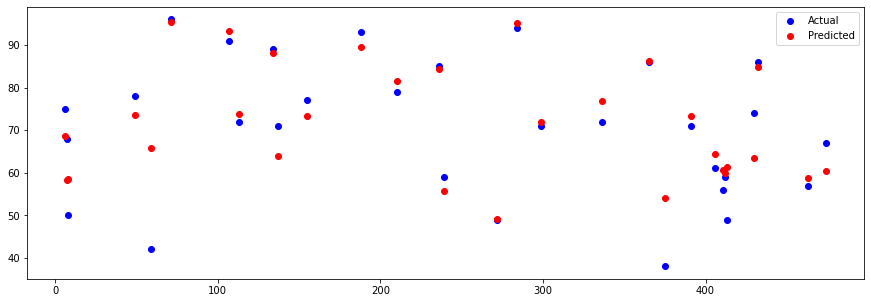

In [71]:
size = 30
plt.scatter(result.index[:size], result["Actual"].head(size), color = "blue", label = "Actual")
plt.scatter(result.index[:size], result["Predicted"].head(size), color = "red", label = "Predicted")
plt.legend()
plt.gcf().set_size_inches(15, 5)

### EVALUATE WITH TEST DATA

In [72]:
# EVALUATE MODEL WITH TEST DATA
y_pred = lr_model.predict(X_test)

In [73]:
lr_model.score(X_test, y_test)

0.7632878240069337

In [74]:
from sklearn.metrics import r2_score

In [75]:
print(r2_score(y_test, y_pred))

0.7632878240069337


In [76]:
res = pd.DataFrame({"Actual" : y_test[:25], "Predicted" : y_pred[:25]})

In [77]:
print(res)

     Actual  Predicted
90     64.0  62.802152
254    85.0  83.209435
283    80.0  79.119818
445    91.0  85.046086
461    68.0  60.222891
15     54.0  66.888863
316    54.0  55.297329
489    65.0  68.293116
159    52.0  55.296602
153    79.0  75.833340
241    65.0  64.873954
250    74.0  71.937657
390    64.0  65.079930
289    79.0  77.885419
171    89.0  86.739467
329    43.0  53.882491
468    81.0  79.022851
355    73.0  65.400002
154    80.0  79.288626
37     58.0  56.219652
205    57.0  50.909131
366    74.0  68.659174
240    60.0  52.225549
108    93.0  90.081384
45     88.0  81.905787


In [78]:
res.shape

(25, 2)

In [79]:
res.head(10)

,Actual,Predicted
90,64.0,62.802152
254,85.0,83.209435
283,80.0,79.119818
445,91.0,85.046086
461,68.0,60.222891
15,54.0,66.888863
316,54.0,55.297329
489,65.0,68.293116
159,52.0,55.296602
153,79.0,75.833340


In [80]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 41.34118975674904
RMSE : 6.429711483165402


### DRAW A SCATTER PLOT WITH BLUE AND RED DOTS FOR ACTUAL AND PREDICTED WITH TEST DATA

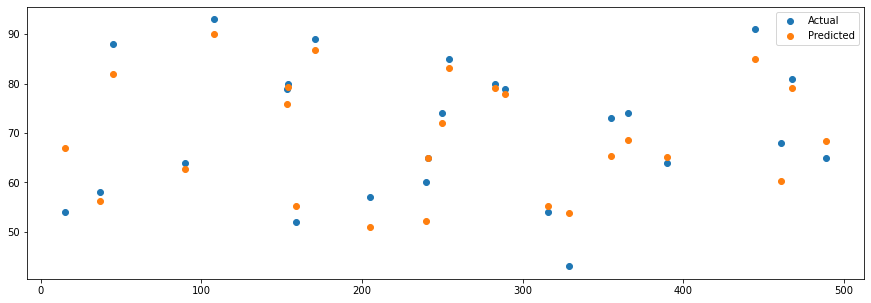

In [81]:
plt.scatter(res.index, res["Actual"], label = "Actual")
plt.scatter(res.index, res["Predicted"], label = "Predicted")
plt.legend()
plt.gcf().set_size_inches(15, 5)

### DRAW A LINE PLOT WITH BLUE AND RED LINES FOR ACTUAL AND PREDICTED DATA WITH TEST DATA

C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


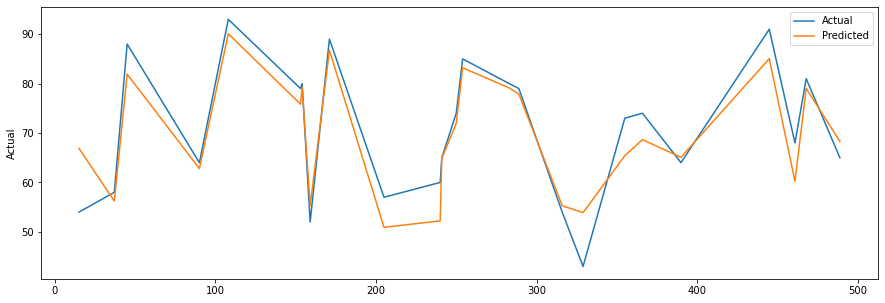

In [82]:
sns.lineplot(res.index, res["Actual"], label = "Actual")
sns.lineplot(res.index, res["Predicted"], label = "Predicted")
plt.gcf().set_size_inches(15, 5)

### PICKLE MODEL

In [ ]:
pd.to_pickle(lr_model, "lr_model.pickle")